In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 

print("Library siap digunakan")

Library siap digunakan


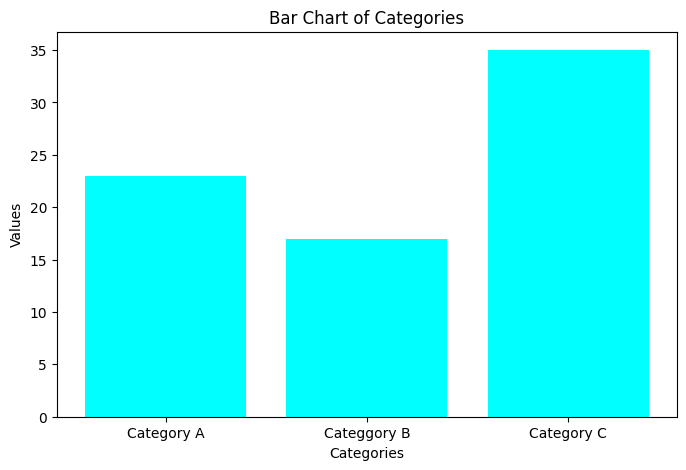

In [2]:
# Exercise 1: Basic Plotting with Matplotlib 
# Data for plotting 
categories = ['Category A', 'Categgory B', 'Category C']
values = [23, 17, 35] 

# Plot 
plt.figure(figsize=(8,5))
plt.bar(categories, values, color='cyan') 
plt.xlabel('Categories')
plt.ylabel('Values') 
plt.title('Bar Chart of Categories')
plt.show()

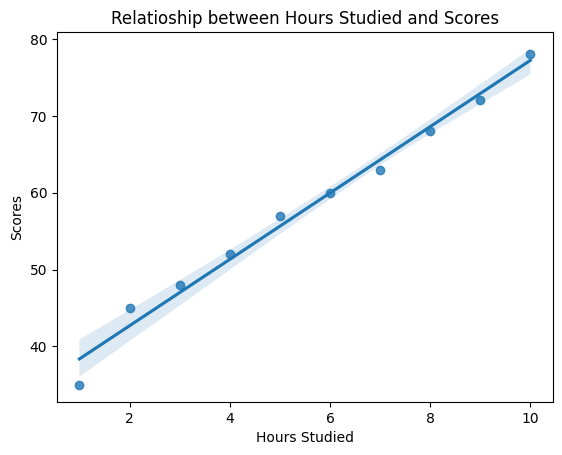

In [5]:
# Exercise 2: Seaborn for Relationship Visualization 
# Sample Data 
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data) 

# Plot 
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relatioship between Hours Studied and Scores')
plt.show()

In [12]:
### Practice Task 
# Use Matplotlib to create a multi-bar chart to compare data across groups.

# Load Dataset
df = pd.read_csv('/home/hadoop/Dataset/Titanic_Dataset.csv')

# Lihat ukuran dan contoh data 
print(df.shape)
df.head()

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


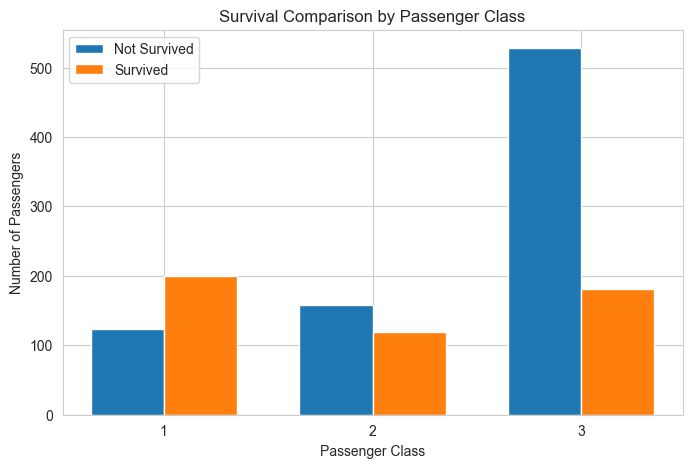

In [14]:
# Kelompokkan data
survival_by_class = df.groupby('pclass')['survived'].value_counts().unstack()

x = np.arange(len(survival_by_class.index))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, survival_by_class[0], width, label='Not Survived')
plt.bar(x + width/2, survival_by_class[1], width, label='Survived')

plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Survival Comparison by Passenger Class')
plt.xticks(x, survival_by_class.index)
plt.legend()
plt.show()

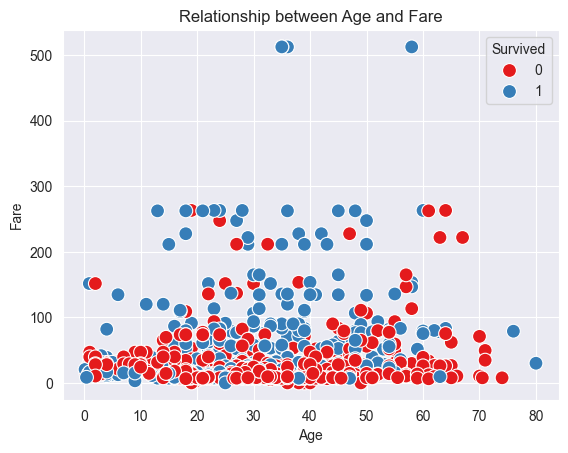

In [16]:
# Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
sns.set_style("darkgrid")

sns.scatterplot(
    x='age',
    y='fare',
    data=df,
    hue='survived',
    palette='Set1',
    s=100
)

plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()


In [18]:
### HomeWork 
import kagglehub

path = kagglehub.dataset_download("jekiwantaufik/west-java-2016-2024")
print("Path to dataset files:", path)

/home/hadoop/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████| 1.98k/1.98k [00:00<00:00, 730kB/s]

Extracting files...
Path to dataset files: /home/hadoop/.cache/kagglehub/datasets/jekiwantaufik/west-java-2016-2024/versions/1


In [21]:
import os

path = "/home/hadoop/.cache/kagglehub/datasets/jekiwantaufik/west-java-2016-2024/versions/1"
os.listdir(path)

['tobacco.csv']

In [24]:
path = "/home/hadoop/.cache/kagglehub/datasets/jekiwantaufik/west-java-2016-2024/versions/1"
df = pd.read_csv(f"{path}/tobacco.csv")

df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_produksi,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,TON,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0,TON,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,46,TON,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1358,TON,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,3597,TON,2016


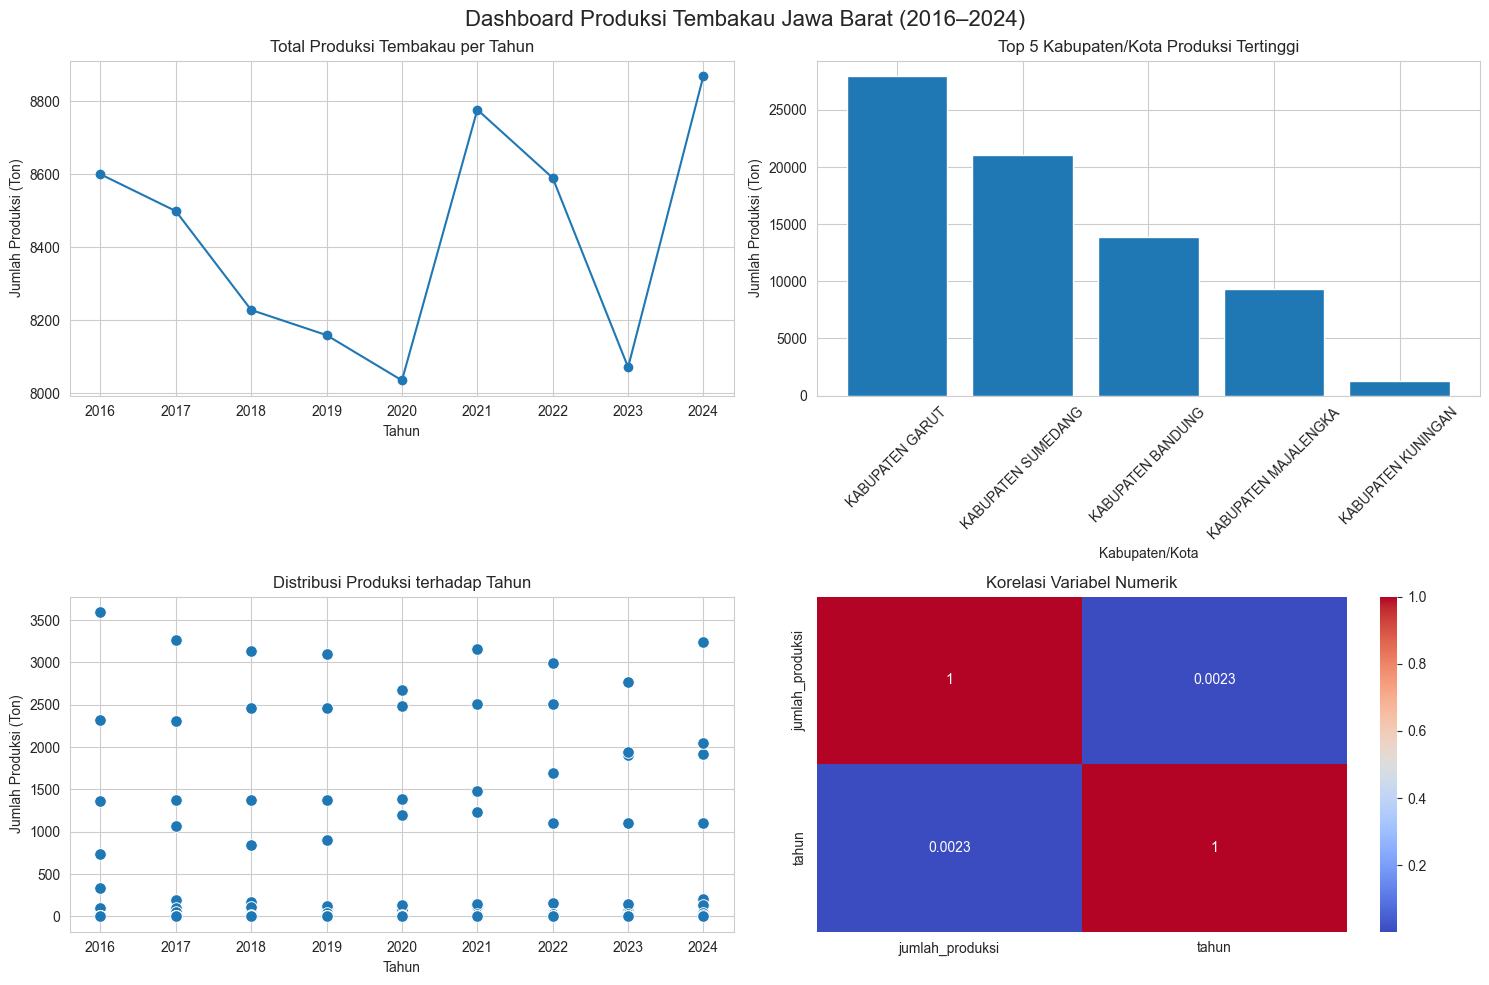

In [25]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Dashboard Produksi Tembakau Jawa Barat (2016–2024)", fontsize=16)

# Total produksi per tahun
produksi_tahun = df.groupby("tahun")["jumlah_produksi"].sum()

axes[0, 0].plot(produksi_tahun.index, produksi_tahun.values, marker='o')
axes[0, 0].set_title("Total Produksi Tembakau per Tahun")
axes[0, 0].set_xlabel("Tahun")
axes[0, 0].set_ylabel("Jumlah Produksi (Ton)")

# Top 5 Kabupaten/Kota dengan produksi tertinggi
top_kabupaten = (
    df.groupby("nama_kabupaten_kota")["jumlah_produksi"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

axes[0, 1].bar(top_kabupaten.index, top_kabupaten.values)
axes[0, 1].set_title("Top 5 Kabupaten/Kota Produksi Tertinggi")
axes[0, 1].set_xlabel("Kabupaten/Kota")
axes[0, 1].set_ylabel("Jumlah Produksi (Ton)")
axes[0, 1].tick_params(axis='x', rotation=45)

# Produksi vs Tahun
sns.scatterplot(
    x="tahun",
    y="jumlah_produksi",
    data=df,
    ax=axes[1, 0],
    s=70
)
axes[1, 0].set_title("Distribusi Produksi terhadap Tahun")
axes[1, 0].set_xlabel("Tahun")
axes[1, 0].set_ylabel("Jumlah Produksi (Ton)")

# Korelasi data numerik
numeric_df = df[["jumlah_produksi", "tahun"]]

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="coolwarm",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Korelasi Variabel Numerik")

plt.tight_layout()
plt.show()